## Remove Image duplicates
The purpose of this notebook is to remove duplicates within downloaded twitter data since there are certain images have been referred multiple times from different source system


In [0]:
# mount the google drive to your Colab session
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read image
# import required packages
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import shutil
plt.style.use('fivethirtyeight')

from sklearn.metrics.pairwise import cosine_similarity


In [0]:
# load images
image_paths = glob.glob('drive/My Drive/capstone image/image_1/*.jpg')
image_paths.extend(glob.glob('drive/My Drive/capstone image/image_1/*.png'))

print(len(image_paths))

14591


In [0]:
# # perform image embedding using InceptionV3
# model = InceptionV3(include_top=False, pooling='avg')
# # model.summary()

In [0]:
#read the pickle file
for k in range(0,14):

  directory = "drive/My Drive/capstone image/embedding/tensor{}.pickle".format(k)
  with open(directory, "rb") as input_file:
    img_file = pickle.load(input_file)
    img_size = 2048
    length = img_file.shape[0]

    sim_matrix = np.zeros((length,length))
    for i in range(length):
      if i+1<length:
        for j in range(i+1,length):
          sim_matrix[i][j] = cosine_similarity(img_file[i].reshape(1,img_size),img_file[j].reshape(1,img_size))
    
    duplicates = np.where(sim_matrix>0.99)
    #remove duplicates and document duplicated entries
    remove_list=[]
    for m,value in enumerate(duplicates[0]):
      if value not in remove_list:
        remove_list.append(duplicates[1][m])
    # new_directory = 'drive/My Drive/capstone image/Duplicated_Image/'
    print(len(remove_list))
    
    image_paths_new = image_paths[k*1000:(k+1)*1000]
    for r in remove_list:
      try:
        new_directory = 'drive/My Drive/capstone image/Duplicated_Image/{}'.format(image_paths_new[r].split('/')[-1])
        shutil.move(image_paths_new[r], new_directory) 
      except:
        pass

        

8
59
61
70
57
65
58
94
168
432
492
486
352
498


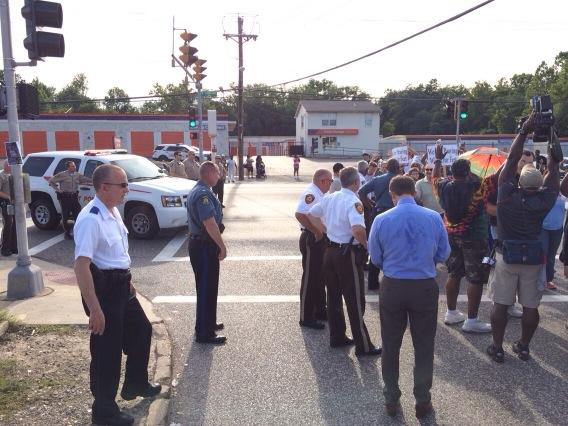

In [0]:
Image(filename=image_paths[127], embed=True, width=500, height=None, retina=False)

In [0]:
directory = "drive/My Drive/capstone image/embedding/tensor{}.pickle".format(k)
  with open(directory, "rb") as input_file:
    img_file = pickle.load(input_file)
    img_size = 2048
    length = img_file.shape[0]

    sim_matrix = np.zeros((length,length))
    for i in range(length):
      if i+1<length:
        for j in range(i+1,length):
          sim_matrix[i][j] = cosine_similarity(img_file[i].reshape(1,img_size),img_file[j].reshape(1,img_size))
    
    duplicates = np.where(sim_matrix>0.99)
    #remove duplicates and document duplicated entries
    remove_list=[]
    for m,value in enumerate(duplicates[0]):
      if value not in remove_list:
        remove_list.append(duplicates[1][m])
    # new_directory = 'drive/My Drive/capstone image/Duplicated_Image/'
    print(len(remove_list))
    
    image_paths_new = image_paths[k*1000:(k+1)*1000]
    for r in remove_list:
      try:
        new_directory = 'drive/My Drive/capstone image/Duplicated_Image/{}'.format(image_paths_new[r].split('/')[-1])
        shutil.move(image_paths_new[r], new_directory) 
      except:
        pass